# Energy NW Model Selection

The purpose of this notebook is to perform featurization on the text column and create a classification model. We will perform multiple tests on the models.

#### Load Data & Libraries

In [1]:
#Standard Libraries
import numpy as np
import pandas as pd
import os

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

#Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

#Model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

#Visualizations
import matplotlib.pyplot as plt

In [2]:
#Loading data from file system
#Data source located: https://github.ibm.com/Jewel-Matsch-Rowekamp/Energy-NW
data = pd.read_csv(os.environ['DSX_PROJECT_DIR']+'/datasets/energy_nw_clean_dataframe.csv')
data.head(15)

,AR_NUMBER,AR_PRIORITY,AR_SEVERITY,PRIORITY_SEVERITY,CONCAT_TEXT_FOR_WKS
0,383472,CAQ,C,CAQ:C,rcic hpcs low cst level swap fill vent suction...
1,383473,CAQ,D,CAQ:D,rcic p not start run sop rcic fill direct star...
2,383474,CAQ,D,CAQ:D,hp drop hpcs suction switchover alarm hp drop ...
3,383476,NCAQ,4,NCAQ:4,bre bre need window evaluate bre
4,383477,CAQ,D,CAQ:D,receive rod drive control sys inop alarm recei...
5,383478,CAQ,D,CAQ:D,hpcs suction switchover alarm locked fill vent...
6,383479,NCAQ,3,NCAQ:3,cw cta approx overflow operator round note due...
7,383490,CAQ,D,CAQ:D,security cctv need maintenance security cctv n...
8,383491,CAQ,C,CAQ:C,sw va change lo without screen anonymous cr de...
9,383497,NCAQ,3,NCAQ:3,ep copiers unable scan email new canon copiers...


### Determine Dependent and Independent Variables

Split data into X & Y (X=independent, Y=dependent)

In [3]:
X_array = data.iloc[:,[0,1,3,4]].values
Y_array = data.iloc[:,2].values

#### Verify Variables <br>
* X should contain the independent columns: AR_NUMBER, AR_PRIORITY, CONCAT_TEXT_FOR_WKS. <br>
* Y should contain the dependent column: AR_SEVERITY

In [4]:
X = pd.DataFrame(X_array, columns=['AR_NUMBER', 'AR_PRIORITY','PRIORITY_SEVERITY','CONCAT_TEXT_FOR_WKS'])
X.head(5)

,AR_NUMBER,AR_PRIORITY,PRIORITY_SEVERITY,CONCAT_TEXT_FOR_WKS
0,383472,CAQ,CAQ:C,rcic hpcs low cst level swap fill vent suction...
1,383473,CAQ,CAQ:D,rcic p not start run sop rcic fill direct star...
2,383474,CAQ,CAQ:D,hp drop hpcs suction switchover alarm hp drop ...
3,383476,NCAQ,NCAQ:4,bre bre need window evaluate bre
4,383477,CAQ,CAQ:D,receive rod drive control sys inop alarm recei...


In [5]:
Y = pd.DataFrame(Y_array, columns=['AR_SEVERITY'])
Y.head(10)

,AR_SEVERITY
0,C
1,D
2,D
3,4
4,D
5,D
6,3
7,D
8,C
9,3


### One Hot Encode Categorical Variables

#### Categorical Dependent Column

In [6]:
Y_OHE = pd.get_dummies(data=Y, drop_first=True)

In [7]:
Y_OHE.head(15)

,AR_SEVERITY_3,AR_SEVERITY_4,AR_SEVERITY_A,AR_SEVERITY_B,AR_SEVERITY_C,AR_SEVERITY_D
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,1,0,0,0,0
4,0,0,0,0,0,1
5,0,0,0,0,0,1
6,1,0,0,0,0,0
7,0,0,0,0,0,1
8,0,0,0,0,1,0
9,1,0,0,0,0,0


#### Categorical Independent Column - AR_Priority
0=CAQ <br>
1=Non-CAQ

In [8]:
X_OHE = pd.get_dummies(data=X, columns=['AR_PRIORITY'], drop_first=True)

In [9]:
X_OHE.head(15)

,AR_NUMBER,PRIORITY_SEVERITY,CONCAT_TEXT_FOR_WKS,AR_PRIORITY_NCAQ
0,383472,CAQ:C,rcic hpcs low cst level swap fill vent suction...,0
1,383473,CAQ:D,rcic p not start run sop rcic fill direct star...,0
2,383474,CAQ:D,hp drop hpcs suction switchover alarm hp drop ...,0
3,383476,NCAQ:4,bre bre need window evaluate bre,1
4,383477,CAQ:D,receive rod drive control sys inop alarm recei...,0
5,383478,CAQ:D,hpcs suction switchover alarm locked fill vent...,0
6,383479,NCAQ:3,cw cta approx overflow operator round note due...,1
7,383490,CAQ:D,security cctv need maintenance security cctv n...,0
8,383491,CAQ:C,sw va change lo without screen anonymous cr de...,0
9,383497,NCAQ:3,ep copiers unable scan email new canon copiers...,1


### Vectorize the Text Column

#### Divide Data into Train and Test Sets

In [12]:
Y_PRIORITY = data.AR_PRIORITY
Y_SEVERITY = data.AR_SEVERITY
Y_PS = data.PRIORITY_SEVERITY

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X['CONCAT_TEXT_FOR_WKS'], Y_PS, random_state = 0)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8502,), (2835,), (8502,), (2835,))

In [25]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    ]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
    

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

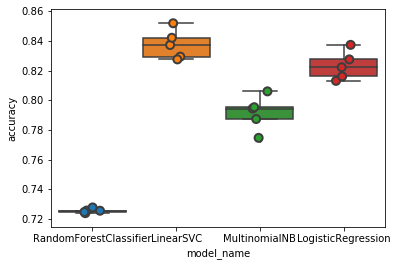

In [26]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [27]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.837611
LogisticRegression        0.823233
MultinomialNB             0.791568
RandomForestClassifier    0.725589
Name: accuracy, dtype: float64

In [ ]:
cv_df